In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

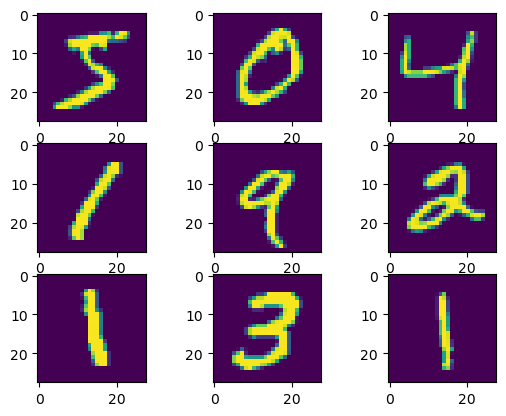

In [3]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_images[i])

In [4]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [5]:
from tensorflow.keras.layers import Flatten, Dense
model = tf.keras.models.Sequential([Flatten(input_shape=(28,28)), 
                                    Dense(256, activation='relu'),
                                    Dense(256, activation='relu'),
                                    Dense(128, activation='relu'), 
                                    Dense(10, activation=tf.nn.softmax)])

In [6]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 7s 3ms/step - loss: 0.2030 - accuracy: 0.9373
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0900 - accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0669 - accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0517 - accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0382 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0346 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0329 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0

In [8]:
test=test_images[0].reshape(-1,28,28)
pred=model.predict(test)
print(pred)

1/1 [==============================] - 0s 97ms/step
[[6.7513529e-13 4.7212660e-09 1.6693608e-08 1.2850593e-10 2.1272021e-08
  2.6581536e-12 2.1933443e-17 9.9999368e-01 4.1015793e-12 6.2756299e-06]]


In [9]:
#Save the model
model.save('model2.h5')
print("The model has successfully saved")

The model has successfully saved


C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
import gradio as gr
import numpy as np
from keras.models import load_model
from PIL import Image, ImageOps

# Load the pre-trained model
model = load_model('model2.h5')

def recognize_digit(image):
    # Convert the Gradio Image object to a NumPy array
    img_array = np.array(image)

    # Convert RGB to grayscale
    img_gray = ImageOps.grayscale(Image.fromarray(img_array))

    # Resize the image to 28x28
    img_resized = img_gray.resize((28, 28), Image.ANTIALIAS)

    # Convert the image to a NumPy array and normalize
    img_data = np.array(img_resized).reshape(1, 28, 28, 1).astype('float32') / 255.0

    # Make prediction
    pred = model.predict(img_data)[0]
    final_pred = np.argmax(pred)
    confidence = int(max(pred) * 100)

    return f"The predicted digit is {final_pred} with {confidence}% confidence."

# Create a Gradio Interface
iface = gr.Interface(fn=recognize_digit, inputs="image", outputs="text")
iface.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 90ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11492\2680565952.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img_gray.resize((28, 28), Image.ANTIALIAS)


1/1 [==============================] - 0s 34ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11492\2680565952.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img_gray.resize((28, 28), Image.ANTIALIAS)


1/1 [==============================] - 0s 29ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11492\2680565952.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img_gray.resize((28, 28), Image.ANTIALIAS)
ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\Lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 408, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ADMIN\anaconda3\Lib\site-packages\uvicorn\middleware\proxy_headers.py", line 84, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ADMIN\anaconda3\Lib\site-packages\fastapi\applications.py", line 1106, in __call__
    await super().__call__(scope, receive, send)
  File "C:\Users\ADMIN\anaconda3\Lib\site-packages\starlette\applications.py", 

1/1 [==============================] - 0s 24ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11492\2680565952.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img_gray.resize((28, 28), Image.ANTIALIAS)


1/1 [==============================] - 0s 21ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11492\2680565952.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img_gray.resize((28, 28), Image.ANTIALIAS)


1/1 [==============================] - 0s 32ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11492\2680565952.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img_gray.resize((28, 28), Image.ANTIALIAS)


1/1 [==============================] - 0s 25ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11492\2680565952.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img_gray.resize((28, 28), Image.ANTIALIAS)


1/1 [==============================] - 0s 31ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11492\2680565952.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img_gray.resize((28, 28), Image.ANTIALIAS)
